# CNN Image classification

Convolutional Neural Network for image classification

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm
from os import listdir
from os.path import isfile, join
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D

In [ ]:
!wget http://techno.varee.ac.th/colab/mosquito.zip
!unzip --qq mosquito.zip

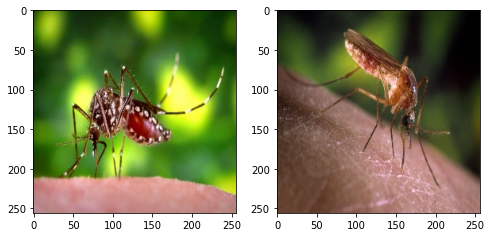

In [3]:
# Aedes = ยุงลาย
img1 = cv2.imread('/content/train/Aedes/Aedes1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Culex = ยุงรำคาญ
img2 = cv2.imread('/content/train/Culex/Culex1.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(img1)
plt.subplot(122), plt.imshow(img2)
plt.show()

In [4]:
# classify to 2 classes (Aedes and Culex)
def img2data(path):
    rawImgs = []
    labels  = []

    for imagePath in path:
        for item in tqdm(listdir(imagePath)):
            filePath = join(imagePath, item)
            if filePath[-1] =='g':
                img = cv2.imread(filePath, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (128, 128))
                rawImgs.append(img)

                # One-Hot Encoding
                label = imagePath.split('/')[1]
                if label == 'Aedes':
                    labels.append([1, 0])         
                elif label == 'Culex':
                    labels.append([0, 1])

    return rawImgs, labels

In [5]:
trainImg = ['train/' + f for f in listdir('train/')]
testImg  = ['test/'  + f for f in listdir('test/')]

print(trainImg, testImg)

['train/Aedes', 'train/Culex'] ['test/Aedes', 'test/Culex']


In [ ]:
# Progress bar because of tqdm 
x_train, y_train = img2data(trainImg)
x_test,  y_test  = img2data(testImg)

In [7]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

# value is RGB (0, 255)
x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32')  / 255

In [9]:
# X: 1200 records, 128 x 128 resolution, 3 dimensions (RGB)
# Y: 1200 records, 2 results (0, 1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1200, 128, 128, 3) (1200, 2) (60, 128, 128, 3) (60, 2)


## Sequential Model

In [10]:
# 2 classes which are Aedes and Culex
num_classes = 2

model = Sequential([
    # Convolution Layers: 128 features, kernal size = 3 x 3
    Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)),

    # Pooling Layers: reduce acquired information size for faster processing
    MaxPool2D(2),

    # redo convolution and pooling layers
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),

    # Dense Layers: 16 cells, Flatten: decresae information dimension
    Dense(16),
    Flatten(),

    # Output Layers: softmax for one-hot and sigmoid for 0/1
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 30, 30, 16)        2064      
                                                                 
 flatten (Flatten)           (None, 14400)             0

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', metrics=['accuracy']
)

In [12]:
# number of train rounds
epochs = 10

# input to neural network 32 per time
batch_size = 32

history = model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=epochs, validation_data=(x_test, y_test)
)

Epoch 1/10
38/38 [==============================] - 12s 65ms/step - loss: 0.5144 - accuracy: 0.7267 - val_loss: 0.3691 - val_accuracy: 0.8833
Epoch 2/10
38/38 [==============================] - 2s 45ms/step - loss: 0.1863 - accuracy: 0.9333 - val_loss: 0.1194 - val_accuracy: 0.9667
Epoch 3/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0699 - accuracy: 0.9825 - val_loss: 0.0847 - val_accuracy: 0.9667
Epoch 4/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0426 - accuracy: 0.9833 - val_loss: 0.1069 - val_accuracy: 0.9667
Epoch 5/10
38/38 [==============================] - 2s 46ms/step - loss: 0.0375 - accuracy: 0.9867 - val_loss: 0.1057 - val_accuracy: 0.9833
Epoch 6/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0218 - accuracy: 0.9958 - val_loss: 0.1522 - val_accuracy: 0.9667
Epoch 7/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0210 - accuracy: 0.9892 - val_loss: 0.1863 - val_accuracy: 0.9667
Epoch 8/10
3

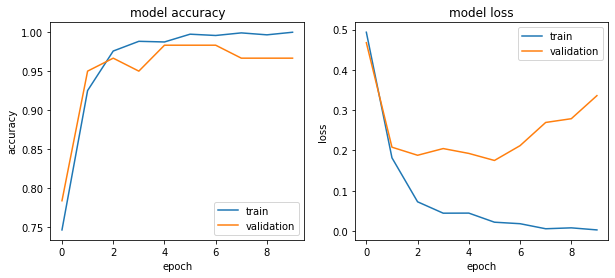

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121),
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(122)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper right')

plt.show()

Aedes = 100.00 %
Culex = 0.00 %


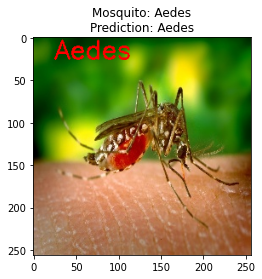

Aedes = 15.37 %
Culex = 84.63 %


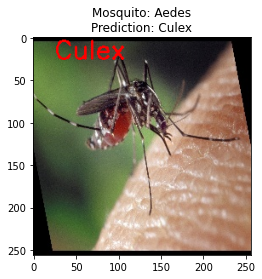

Aedes = 97.77 %
Culex = 2.23 %


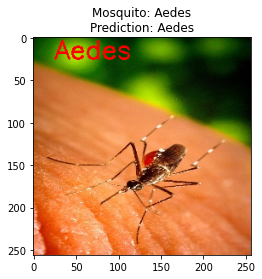

Aedes = 97.42 %
Culex = 2.58 %


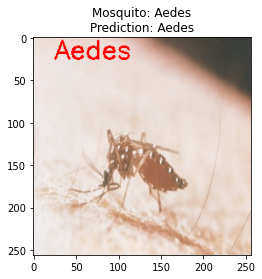

Aedes = 100.00 %
Culex = 0.00 %


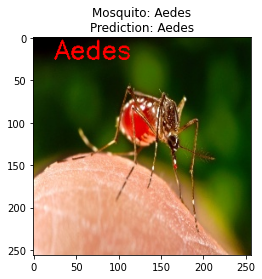

Aedes = 99.96 %
Culex = 0.04 %


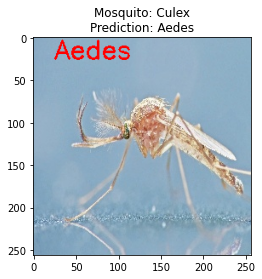

Aedes = 1.55 %
Culex = 98.45 %


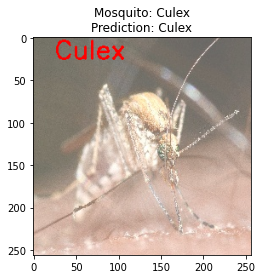

Aedes = 99.73 %
Culex = 0.27 %


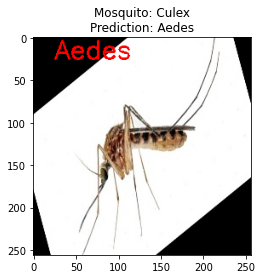

Aedes = 0.61 %
Culex = 99.39 %


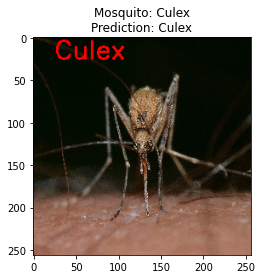

Aedes = 0.17 %
Culex = 99.83 %


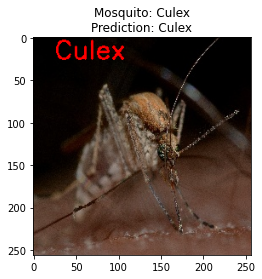

Correction: 7 / 10
Percentage: 70.0


In [18]:
# Constant
WIDTH = 128
RED   = (255, 0, 0)
LABEL = ['Aedes', 'Culex']

# Path to test image
testPath = "test/"
testImg  = [testPath + f for f in listdir(testPath)]

total   = 0
correct = 0

for imagePath in testImg:
    for i, item in enumerate(listdir(imagePath)[:5]):
        file_path = join(imagePath, item)
        if file_path[-1] =='g':
          imgOrigin = cv2.imread(file_path)
          imgOrigin = cv2.cvtColor(imgOrigin, cv2.COLOR_BGR2RGB)

          imgResize = np.array(cv2.resize(imgOrigin, (WIDTH, WIDTH)))
          imgResize = imgResize.astype('float32') / 255
          imgResize = np.reshape(imgResize, (1, 128, 128, 3))
          
          predict = model.predict(imgResize)
          result  = LABEL[np.argmax(predict)]
          print(f"Aedes = {100 * predict[0][0]:.2f} %")
          print(f"Culex = {100 * predict[0][1]:.2f} %")

          correct += 1 if item[:5] == result else 0
          total   += 1

          # coordinates of the bottom-left corner of the text
          cv2.putText(imgOrigin, str(result), (25, 25), \
                      cv2.FONT_HERSHEY_SIMPLEX, 1, RED, 2)

          plt.imshow(imgOrigin)
          plt.title(f"Mosquito: {item[:5]}\nPrediction: {result}")
          plt.show()

print(f"Correction: {correct} / {total}")
print(f"Percentage: {correct / total * 100}")

In [ ]:
model.save("./models/mosquitoClassifier.h5")

---

## Transfer learning with MobilenetV2

use already trained model

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False, weights='imagenet'
)

# don't train base model
base_model.trainable = False
num_classes = 2

model = Sequential([
    base_model,
    Conv2D(128, 3, activation='relu'),
    Dense(16),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 128)         1474688   
                                                                 
 dense_4 (Dense)             (None, 2, 2, 16)          2064      
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 3,734,866
Trainable params: 1,476,882
Non-trainable params: 2,257,984
____________________________________

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', metrics=['accuracy']
)

In [21]:
# number of train rounds
epochs = 10

# input to neural network 32 per time
batch_size = 32

history = model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=epochs, validation_data=(x_test, y_test)
)

Epoch 1/10
38/38 [==============================] - 5s 56ms/step - loss: 0.8000 - accuracy: 0.9283 - val_loss: 0.1207 - val_accuracy: 0.9833
Epoch 2/10
38/38 [==============================] - 1s 20ms/step - loss: 6.1337e-04 - accuracy: 1.0000 - val_loss: 0.0568 - val_accuracy: 0.9833
Epoch 3/10
38/38 [==============================] - 1s 20ms/step - loss: 1.6915e-04 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 0.9833
Epoch 4/10
38/38 [==============================] - 1s 20ms/step - loss: 8.8337e-05 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 0.9833
Epoch 5/10
38/38 [==============================] - 1s 21ms/step - loss: 6.2621e-05 - accuracy: 1.0000 - val_loss: 0.0351 - val_accuracy: 0.9833
Epoch 6/10
38/38 [==============================] - 1s 21ms/step - loss: 5.0761e-05 - accuracy: 1.0000 - val_loss: 0.0363 - val_accuracy: 0.9833
Epoch 7/10
38/38 [==============================] - 1s 21ms/step - loss: 4.2375e-05 - accuracy: 1.0000 - val_loss: 0.0360 - val_accura

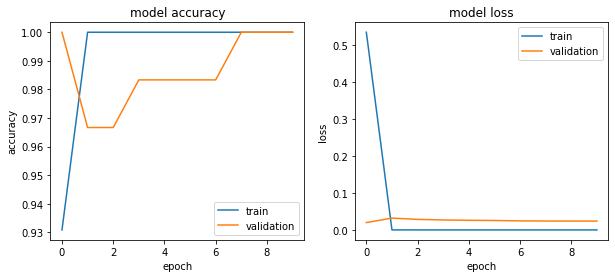

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121),
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(122)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper right')

plt.show()



---



---


This for try out your image

Aedes = 98.52 %
Culex = 1.48 %


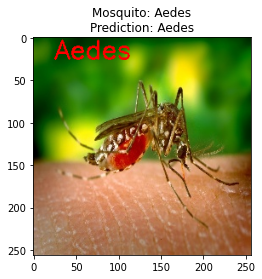

Aedes = 99.21 %
Culex = 0.79 %


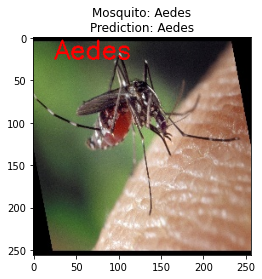

Aedes = 100.00 %
Culex = 0.00 %


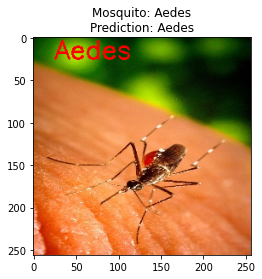

Aedes = 100.00 %
Culex = 0.00 %


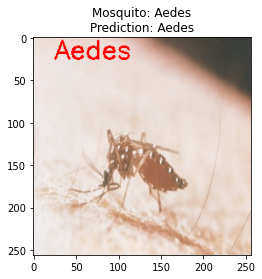

Aedes = 100.00 %
Culex = 0.00 %


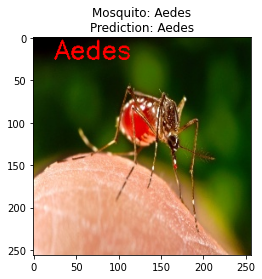

Aedes = 0.01 %
Culex = 99.99 %


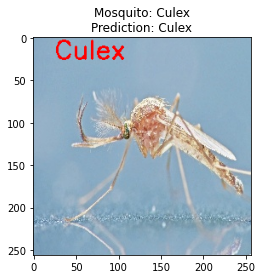

Aedes = 0.00 %
Culex = 100.00 %


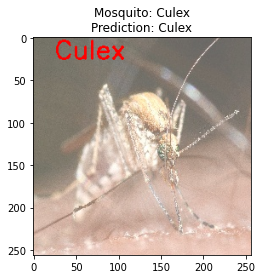

Aedes = 99.70 %
Culex = 0.30 %


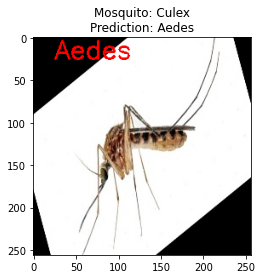

Aedes = 0.01 %
Culex = 99.99 %


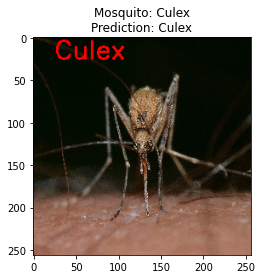

Aedes = 0.00 %
Culex = 100.00 %


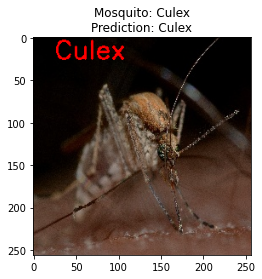

Correction: 9 / 10
Percentage: 90.0


In [22]:
# Constant
WIDTH = 128
RED   = (255, 0, 0)
LABEL = ['Aedes', 'Culex']

# Path to test image
testPath = "test/"
testImg  = [testPath + f for f in listdir(testPath)]

total   = 0
correct = 0

for imagePath in testImg:
    for i, item in enumerate(listdir(imagePath)[:5]):
        file_path = join(imagePath, item)
        if file_path[-1] =='g':
          imgOrigin = cv2.imread(file_path)
          imgOrigin = cv2.cvtColor(imgOrigin, cv2.COLOR_BGR2RGB)

          imgResize = np.array(cv2.resize(imgOrigin, (WIDTH, WIDTH)))
          imgResize = imgResize.astype('float32') / 255
          imgResize = np.reshape(imgResize, (1, 128, 128, 3))
          
          predict = model.predict(imgResize)
          result  = LABEL[np.argmax(predict)]
          print(f"Aedes = {100 * predict[0][0]:.2f} %")
          print(f"Culex = {100 * predict[0][1]:.2f} %")

          correct += 1 if item[:5] == result else 0
          total   += 1

          # coordinates of the bottom-left corner of the text
          cv2.putText(imgOrigin, str(result), (25, 25), \
                      cv2.FONT_HERSHEY_SIMPLEX, 1, RED, 2)

          plt.imshow(imgOrigin)
          plt.title(f"Mosquito: {item[:5]}\nPrediction: {result}")
          plt.show()

print(f"Correction: {correct} / {total}")
print(f"Percentage: {correct / total * 100}")

In [ ]:
model.save("./models/mosquitoClassifier.h5")

## Test with your own image

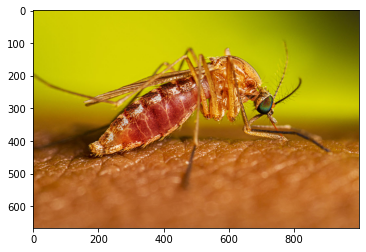

Aedes = 100.00 %
Culex = 0.00 %
Prediction = Aedes


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model


WIDTH = 128
LABEL = ['Aedes', 'Culex']

imgOrigin = cv2.imread("./assets/mosquitoTest.jpg")
imgOrigin = cv2.cvtColor(imgOrigin, cv2.COLOR_BGR2RGB)
plt.imshow(imgOrigin)
plt.show()

imgResize = np.array(cv2.resize(imgOrigin, (WIDTH, WIDTH)))
imgResize = imgResize.astype('float32') / 255
imgResize = np.reshape(imgResize, (1, WIDTH, WIDTH, 3))

# load model
MODEL = load_model('./models/mosquitoClassifier.h5')
predict = MODEL.predict(imgResize)
print(f"Aedes = {100 * predict[0][0]:.2f} %")
print(f"Culex = {100 * predict[0][1]:.2f} %")

result  = LABEL[np.argmax(predict)]
print(f"Prediction = {result}")

# END of notebook